In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"Binance_1INCHBTC_d.csv",header=1)
df.head()

,Unix,Date,Symbol,Open,High,Low,Close,Volume 1INCH,Volume BTC,tradecount
0,1712188800000,2024-04-04,1INCHBTC,0.000008,0.000008,0.000008,0.000008,146649.2,1.188874,784
1,1712102400000,2024-04-03,1INCHBTC,0.000008,0.000008,0.000008,0.000008,184248.6,1.516869,3074
2,1712016000000,2024-04-02,1INCHBTC,0.000009,0.000009,0.000008,0.000008,346705.1,2.900660,1691
3,1711929600000,2024-04-01,1INCHBTC,0.000009,0.000009,0.000008,0.000009,418967.0,3.642781,3404
4,1711843200000,2024-03-31,1INCHBTC,0.000009,0.000009,0.000009,0.000009,105479.9,0.908705,1303


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unix          1197 non-null   int64  
 1   Date          1197 non-null   object 
 2   Symbol        1197 non-null   object 
 3   Open          1197 non-null   float64
 4   High          1197 non-null   float64
 5   Low           1197 non-null   float64
 6   Close         1197 non-null   float64
 7   Volume 1INCH  1197 non-null   float64
 8   Volume BTC    1197 non-null   float64
 9   tradecount    1197 non-null   int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 93.6+ KB


In [4]:
df['Date']=pd.to_datetime(df['Date']) # to convert object to datetime

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unix          1197 non-null   int64         
 1   Date          1197 non-null   datetime64[ns]
 2   Symbol        1197 non-null   object        
 3   Open          1197 non-null   float64       
 4   High          1197 non-null   float64       
 5   Low           1197 non-null   float64       
 6   Close         1197 non-null   float64       
 7   Volume 1INCH  1197 non-null   float64       
 8   Volume BTC    1197 non-null   float64       
 9   tradecount    1197 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 93.6+ KB


In [6]:
df.isnull().sum()

Unix            0
Date            0
Symbol          0
Open            0
High            0
Low             0
Close           0
Volume 1INCH    0
Volume BTC      0
tradecount      0
dtype: int64

In [7]:
close_price=df[['Date','Close']]
close_price.shape

(1197, 2)

In [8]:
close_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1197 non-null   datetime64[ns]
 1   Close   1197 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.8 KB


In [9]:
close_price=close_price.set_index("Date")
close_price.head()

,Close
Date,
2024-04-04,0.000008
2024-04-03,0.000008
2024-04-02,0.000008
2024-04-01,0.000009
2024-03-31,0.000009


In [10]:
y=close_price['Close'].resample("d").mean()

In [11]:
print(y.shape)
y

(1197,)


Date
2020-12-25    0.000093
2020-12-26    0.000060
2020-12-27    0.000040
2020-12-28    0.000041
2020-12-29    0.000032
                ...   
2024-03-31    0.000009
2024-04-01    0.000009
2024-04-02    0.000008
2024-04-03    0.000008
2024-04-04    0.000008
Freq: D, Name: Close, Length: 1197, dtype: float64

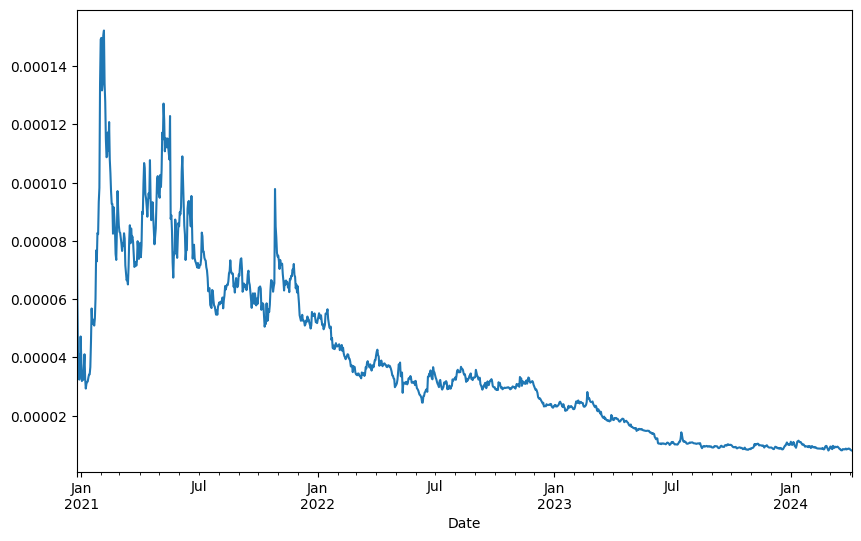

In [12]:
y.plot(figsize=(10,6))
plt.show()

In [13]:
#y=close_price['close'].resample("M").mean() # on montholy bases

In [14]:
#print(y.shape)
#y

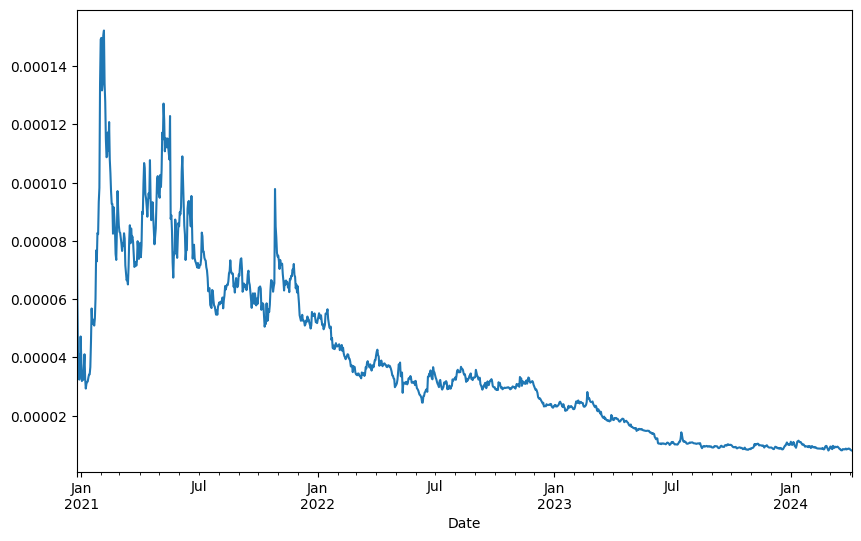

In [15]:
y.plot(figsize=(10,6))
plt.show()

In [16]:
train=y.loc[:'2024-02-28']
print(train.shape)
train

(1161,)


Date
2020-12-25    0.000093
2020-12-26    0.000060
2020-12-27    0.000040
2020-12-28    0.000041
2020-12-29    0.000032
                ...   
2024-02-24    0.000010
2024-02-25    0.000010
2024-02-26    0.000009
2024-02-27    0.000009
2024-02-28    0.000008
Freq: D, Name: Close, Length: 1161, dtype: float64

In [17]:
test=y.loc['2024-03-28':]
print(test.shape)
test

(8,)


Date
2024-03-28    0.000009
2024-03-29    0.000009
2024-03-30    0.000009
2024-03-31    0.000009
2024-04-01    0.000009
2024-04-02    0.000008
2024-04-03    0.000008
2024-04-04    0.000008
Freq: D, Name: Close, dtype: float64

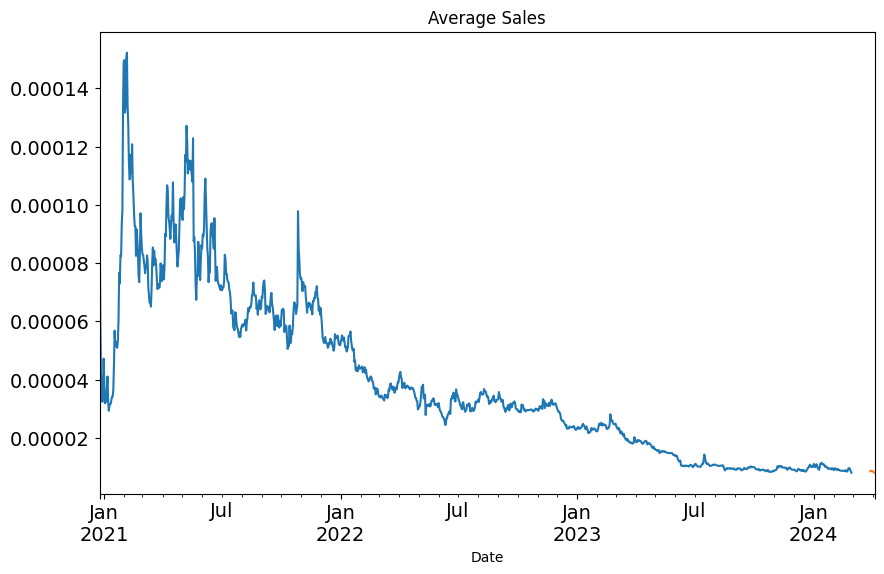

In [18]:
# plotting the data
train.plot(figsize=(10,6),title= "Average Sales", fontsize=14)
test.plot(figsize=(10,6),title= "Average Sales", fontsize=14)
plt.show()

# SimpleExpSmoothing 

d:\anaconda\envs\salesdeploy\lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


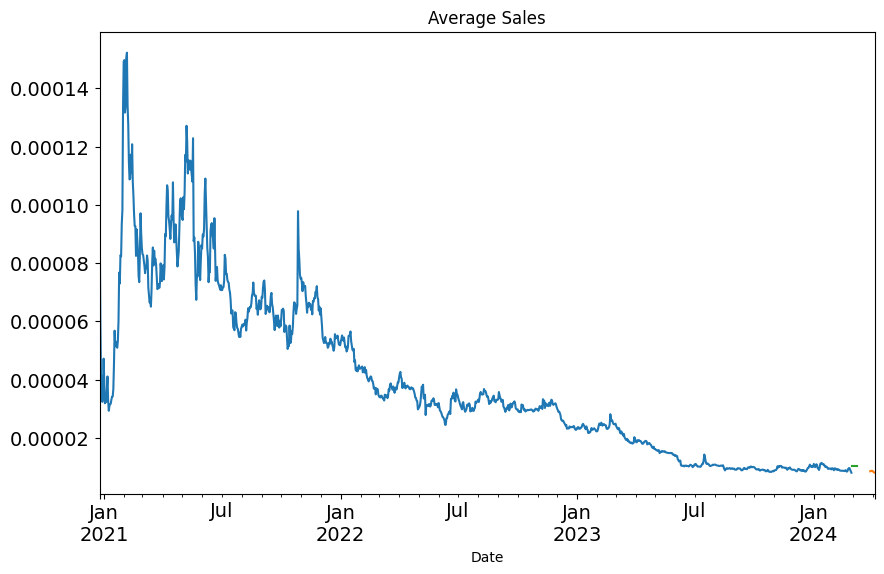

In [19]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.01)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [20]:
Exp_Smooth.SES # predicted values

2024-02-29    0.00001
2024-03-01    0.00001
2024-03-02    0.00001
2024-03-03    0.00001
2024-03-04    0.00001
2024-03-05    0.00001
2024-03-06    0.00001
2024-03-07    0.00001
Freq: D, dtype: float64

In [21]:
fit1.aic # get aic value

-25986.369417878668

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test,Exp_Smooth.SES))
print(rmse)

1.837811000972749e-06


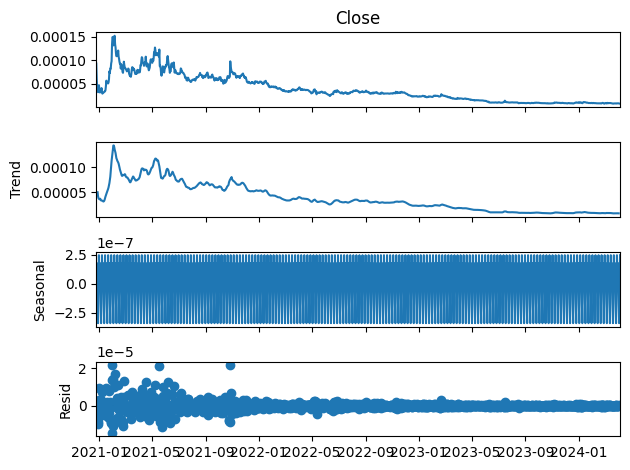

In [23]:
import statsmodels.api as sm 
decomposition=sm.tsa.seasonal_decompose(y)  # by looking on the trend and seasoniality decide which method is to apply
fig=decomposition.plot()
plt.show()

- no trend+ had seasonality holt-winter method is used

# using Holt method 

C:\Users\Vaishnavi Adke\AppData\Local\Temp\ipykernel_3860\2284330733.py:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train).fit(smoothing_level=0.01,smoothing_slope=0.25)
d:\anaconda\envs\salesdeploy\lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


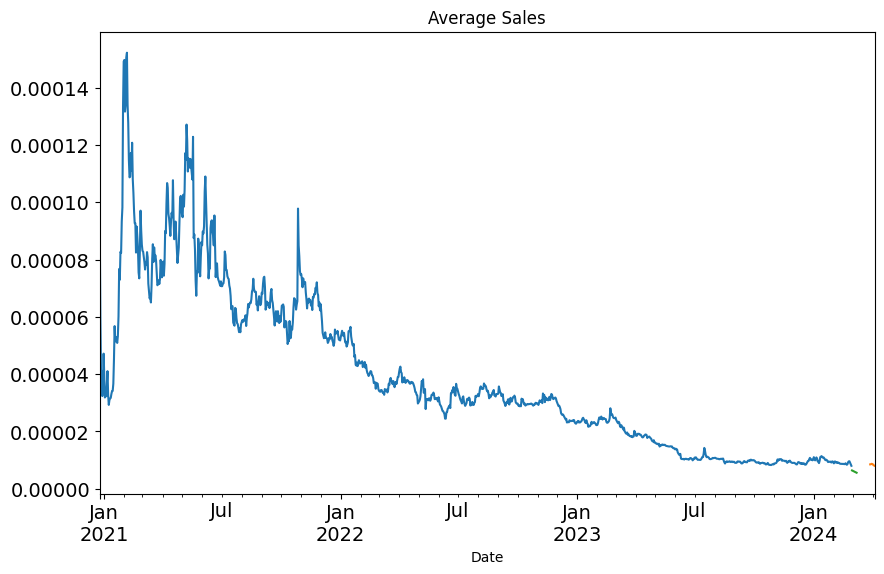

In [24]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing level=alpha
#smoothing slope=beta
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = Holt(train).fit(smoothing_level=0.01,smoothing_slope=0.25)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [25]:
fit1.aic

-20499.98158295363

In [26]:
sm.__version__

'0.14.1'

In [27]:
Holt_df['Holt_linear']

2024-02-29    0.000006
2024-03-01    0.000006
2024-03-02    0.000006
2024-03-03    0.000006
2024-03-04    0.000006
2024-03-05    0.000006
2024-03-06    0.000006
2024-03-07    0.000006
Freq: D, dtype: float64

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test,Holt_df.Holt_linear))
print(rmse)

2.4312726504505805e-06


# best alpha and beta value 

"""
import numpy as np
for i in np.arange(0,1,0.01):
    for j in np.arange(0,1,0.01):
        #from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        #soothing slope=beta
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
        #Holt_df['Holt_linear'] = fit1.forecast(len(test))
        print(fit1.aic,i,j)
"""

# ExponentialSmoothing 

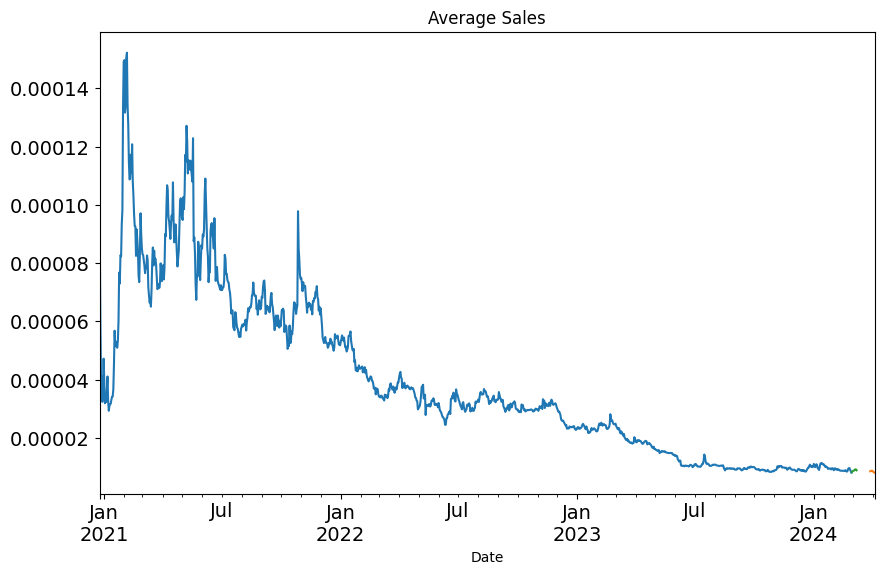

In [29]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#smoothing level=alpha
#smoothing slope=beta
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = ExponentialSmoothing(train,seasonal_periods=12,trend='add',seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [30]:
fit1.aic

-28669.05168772264

In [31]:
Holt_Winter_df['Holt_Winter']

2024-02-29    0.000008
2024-03-01    0.000009
2024-03-02    0.000009
2024-03-03    0.000009
2024-03-04    0.000009
2024-03-05    0.000009
2024-03-06    0.000009
2024-03-07    0.000009
Freq: D, dtype: float64

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test,Holt_Winter_df.Holt_Winter))
print(rmse)

5.933627527357593e-07


# ExponentialSmoothing for all data 

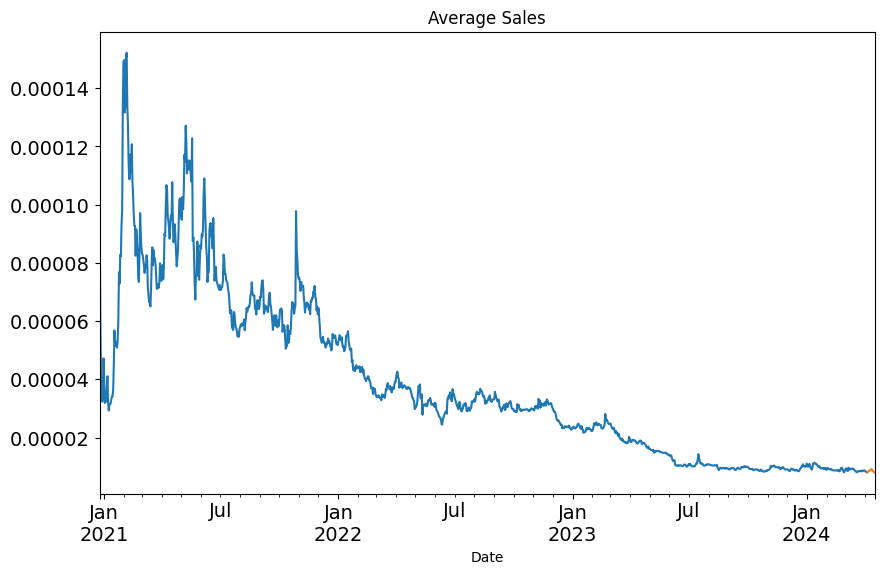

In [33]:
from statsmodels.tsa.api import ExponentialSmoothing
#seasinalperiods=gamma
fit1 = ExponentialSmoothing(y,seasonal_periods=12,trend='add',seasonal='add').fit()
#Y_predictions= fit1.predict(start=pd.to_datetime('2017-01-31'))
Y_prediction = fit1.forecast(steps=12)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_prediction.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [34]:
fit1.aic

-29595.238517065147

In [35]:
Y_prediction

2024-04-05    0.000008
2024-04-06    0.000008
2024-04-07    0.000009
2024-04-08    0.000009
2024-04-09    0.000009
2024-04-10    0.000009
2024-04-11    0.000009
2024-04-12    0.000009
2024-04-13    0.000009
2024-04-14    0.000008
2024-04-15    0.000008
2024-04-16    0.000008
Freq: D, dtype: float64

# ExponentialSmoothing using predict data 

In [36]:
y.shape

(1197,)

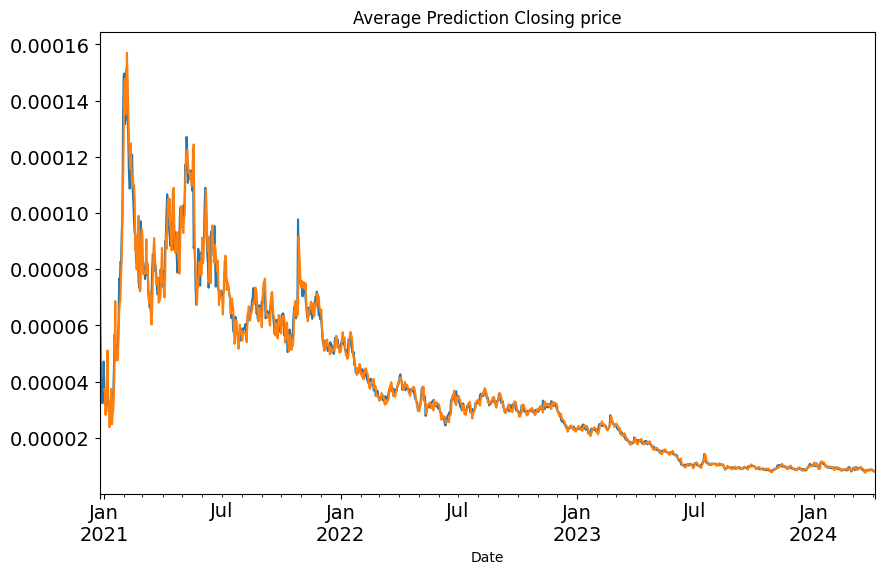

In [37]:
from statsmodels.tsa.api import ExponentialSmoothing
#seasinalperiods=gamma
fit1 = ExponentialSmoothing(y,seasonal_periods=12,trend='add',seasonal='add').fit()
Y_prediction= fit1.predict(start=pd.to_datetime('2021-01-01')) # using predict
#Y_prediction = fit1.forecast(steps=12)

y.plot(figsize=(10,6), title= 'Average Closing price', fontsize=14)
Y_prediction.plot(figsize=(10,6), title= 'Average Prediction Closing price', fontsize=14)
plt.show()

In [38]:
Y_prediction

Date
2021-01-01    0.000037
2021-01-02    0.000036
2021-01-03    0.000028
2021-01-04    0.000033
2021-01-05    0.000036
                ...   
2024-03-31    0.000008
2024-04-01    0.000008
2024-04-02    0.000008
2024-04-03    0.000008
2024-04-04    0.000008
Freq: D, Length: 1190, dtype: float64

In [39]:
Y_prediction.to_csv(r'TimeSeriesOutput.csv',index=True)

# ARIMA 

In [40]:
! python -m pip install pmdarima

In [41]:
import pmdarima as pm # to find the best p d q values

In [42]:
"""
Box-Jenkins Method:
1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
2.Estimation-build the model using the optimum values
3.Validation-interpret how good is the model by validation testing
4.Forecasting- forecast for future time periods
"""

'\nBox-Jenkins Method:\n1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()\n2.Estimation-build the model using the optimum values\n3.Validation-interpret how good is the model by validation testing\n4.Forecasting- forecast for future time periods\n'

In [43]:
#p+q+P+Q<=10 for max_order=10
#p+q<=3

In [44]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-21669.175, Time=0.20 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=2.41 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-23531.262, Time=2.47 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-20427.353, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-22911.428, Time=0.75 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-24032.025, Time=6.92 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-24143.880, Time=7.87 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=-24012.382, Time=14.98 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=-24254.318, Time=5.81 sec
 ARIMA(0,0,1)(3,0,1)[12] intercept   : AIC=-24205.063, Time=21.57 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=-24801.837, Time=9.83 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=-24811.099, Time=16.16 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-23957.691, Time=4.79 sec
 ARIMA(0,0,1)(1,0,3)[12] intercept   : AIC=-23955.228, Time=19.6

In [45]:
model.aic()

-25938.003881878212

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,1,12)).fit()

d:\anaconda\envs\salesdeploy\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


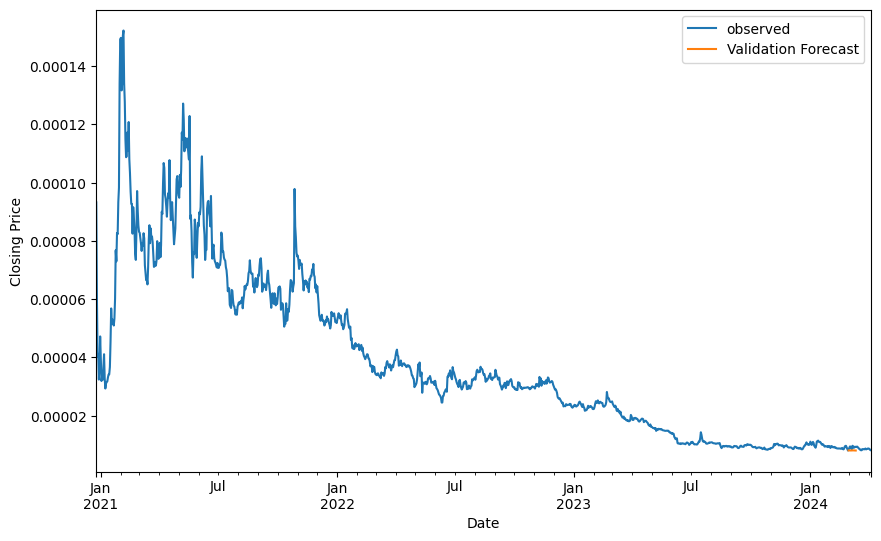

In [47]:

pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
plt.legend()
plt.show()

In [48]:
pred.predicted_mean

2024-02-29    0.000008
2024-03-01    0.000008
2024-03-02    0.000008
2024-03-03    0.000008
2024-03-04    0.000008
2024-03-05    0.000008
2024-03-06    0.000008
2024-03-07    0.000008
2024-03-08    0.000008
2024-03-09    0.000008
2024-03-10    0.000008
2024-03-11    0.000008
Freq: D, Name: predicted_mean, dtype: float64

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(y,order=(0,1,0),seasonal_order=(1,0,1,12)).fit()

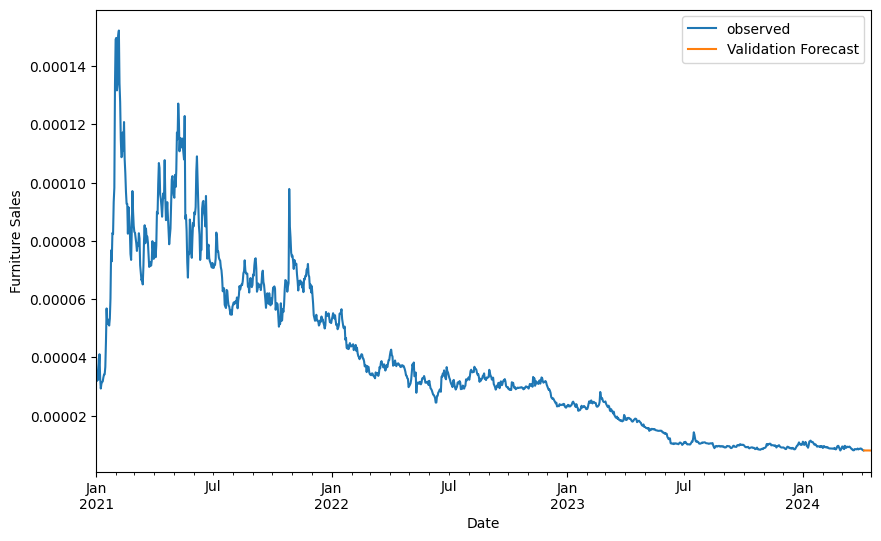

In [50]:
#pred = model.get_prediction(start=pd.to_datetime('2021-01-1')) 
pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y['2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [51]:
pred.predicted_mean.tail(12)

2024-04-05    0.000008
2024-04-06    0.000008
2024-04-07    0.000008
2024-04-08    0.000008
2024-04-09    0.000008
2024-04-10    0.000008
2024-04-11    0.000008
2024-04-12    0.000008
2024-04-13    0.000008
2024-04-14    0.000008
2024-04-15    0.000008
2024-04-16    0.000008
Freq: D, Name: predicted_mean, dtype: float64